Nearest Neighbor Algorithms	 -> Unsupervised learning , Supervised --> Classification & regression
    Nearest Neighbor Analysis
    --->Ball tree , KD Tree 
	Classifying Data with Average Nearest Neighbor Algorithms
	Classifying with K-Nearest Neighbor Algorithms
K-Nearest Neighbor Algorithms	
    Knowing when to use the k-nearest neighbor algorithm
	Nearest Neighbor Distances
	Real-World Problems with Nearest Neighbor Algorithms - Mini Project 7
Multi-Criteria Decision Making (MCDM)	
    Multi-criteria analysis
	Taylor polynomials
	Bisection search algorithm
	Bisection Functions
	Markov Chains and Stochastic Methods

In [2]:
from sklearn.neighbors import NearestNeighbors #--> kd tree & ball tree will be metrics
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
a= NearestNeighbors(n_neighbors=5,algorithm='ball_tree')
#fit 
ff=a.fit(X)
dis, ind =ff.kneighbors(X)
print(dis)
print(ind)

[[0.         1.         2.23606798 2.82842712 3.60555128]
 [0.         1.         1.41421356 3.60555128 4.47213595]
 [0.         1.41421356 2.23606798 5.         5.83095189]
 [0.         1.         2.23606798 2.82842712 3.60555128]
 [0.         1.         1.41421356 3.60555128 4.47213595]
 [0.         1.41421356 2.23606798 5.         5.83095189]]
[[0 1 2 3 4]
 [1 0 2 3 4]
 [2 1 0 3 4]
 [3 4 5 0 1]
 [4 3 5 0 1]
 [5 4 3 0 1]]


In [5]:
#KD Tree

from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X,leaf_size=30,metric='euclidean')
kdt.query(X, k=5,return_distance=True)

(array([[0.        , 1.        , 2.23606798, 2.82842712, 3.60555128],
        [0.        , 1.        , 1.41421356, 3.60555128, 4.47213595],
        [0.        , 1.41421356, 2.23606798, 5.        , 5.83095189],
        [0.        , 1.        , 2.23606798, 2.82842712, 3.60555128],
        [0.        , 1.        , 1.41421356, 3.60555128, 4.47213595],
        [0.        , 1.41421356, 2.23606798, 5.        , 5.83095189]]),
 array([[0, 1, 2, 3, 4],
        [1, 0, 2, 3, 4],
        [2, 1, 0, 3, 4],
        [3, 4, 5, 0, 1],
        [4, 3, 5, 0, 1],
        [5, 4, 3, 0, 1]], dtype=int64))

In [13]:
#Classifying Data with Average Nearest Neighbor Algorithms

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import RadiusNeighborsClassifier
n= RadiusNeighborsClassifier(radius=0.1)
n.fit(X,y)
print(n.predict([[1],[2]]))

[0 1]


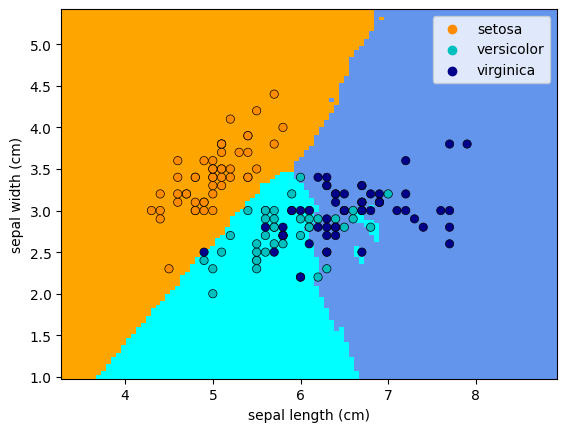

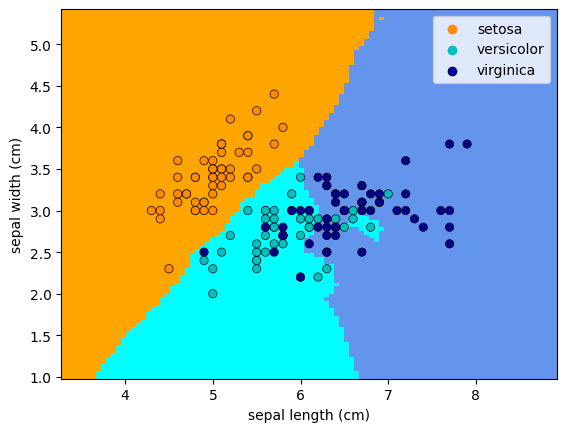

In [16]:
#Classifying with K-Nearest Neighbor Algorithms
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
n_neighbors = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )
    
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

K-Nearest Neighbor Algorithms	
    Knowing when to use the k-nearest neighbor algorithm
	Nearest Neighbor Distances
	Real-World Problems with Nearest Neighbor Algorithm

1.representation and prediction
2.choose K value and distance metric
3.It will  fall under Supervised Learning category and is used for classification (most commonly) and regression

Metric:

1.Euclidean distance
2.Hamming distance
3.Manhattan distance
4.Minkowski distance

->For classification: A class label assigned to the majority of K Nearest Neighbors from the training dataset is considered as a predicted class for the new data point.

->For regression: Mean or median of continuous values assigned to K Nearest Neighbors from training dataset is a predicted continuous value for our new data point




0.9

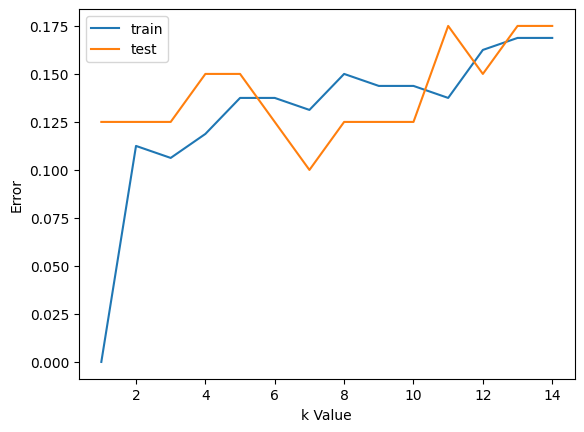

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)

s=StandardScaler()

s.fit(X_train)

X_train=s.transform(X_train)

s.fit(X_test)

X_test=s.transform(X_test)

error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
#plt.figure(figsize(10,5))    
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()



knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

Multi-Criteria Decision Making (MCDM)-->Analysing Multiple/ Different criteria for making decisions 
    
    Multi-criteria analysis -> Adavanced Level of analysis, It will be working in high decision making companies 
	Taylor polynomials ---> only one result 
    
    Taylor series -> n=200 
    
    eg: 1 + 1^2 + 1^3  --> 0 -> Maclaurian series
   
	Bisection search algorithm -> It is also known as binary search 
    
    for loop -> lineaer search 
    [1..............56........100]
    
    binary search:
    
    a=[1,2,3,4,5,6,7,8,9]  
    
    id=5
    low=0
    high=(len-1)
    
    def fun(a,id,low, high)
    mid  = low + (high - low)//2
    
    three:
    
    a[mid] == id 
    
    a[mid] > id   --> check of left 
        fun(a, id ,low =0,high=mid-1)
    
    a[mid] < id 
       fun(a,id, low=mid+1 , high =len-1)
    
	Bisection Functions
	Markov Chains and Stochastic Methods

Bisection search algorithm

start

Define function f(x)

Choose initial guesses x0 and x1 such that f(x0)f(x1) < 0

Choose pre-specified tolerable error e.

Calculate new approximated root as x2 = (x0 + x1)/2

Calculate f(x0)f(x2) a. if f(x0)f(x2) < 0 then x0 = x0 and x1 = x2 b. if f(x0)f(x2) > 0 then x0 = x2 and x1 = x1 c. if f(x0)f(x2) = 0 then goto (8)

if |f(x2)| > e then goto (5) otherwise |f(x2)| < e goto (8)

Display x2 as root.

Stop


 Markov Chains -> It is the sequence of possible events or probability 
 
 | A | 0.6 | 0.4 | — 0.4 is the probability for state A to go to state E and 0.6 is the probability

In [22]:
def f(x):
    return x**3-5*x-9 #2.5**3-5*2.5-9

def bisection(x0,x1,e): #2,3,0.00001
    step = 1
    condition = True
    while condition:
        x2 = (x0 + x1)/2 # (2+3/2)
        print('Iteration-%d, x2 = %0.6f and f(x2) = %0.6f' % (step, x2, f(x2)))

        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2
        
        step = step + 1
        condition = abs(f(x2)) > e

    print('\nRequired Root is : %0.8f' % x2)

x0 = 2
x1 = 3
e = 0.00001
x0 = float(x0)
x1 = float(x1)
e = float(e)


if f(x0) * f(x1) > 0.0:
    print('Given guess values do not bracket the root.')
    print('Try Again with different guess values.')
else:
    bisection(x0,x1,e)   

Iteration-1, x2 = 2.500000 and f(x2) = -5.875000
Iteration-2, x2 = 2.750000 and f(x2) = -1.953125
Iteration-3, x2 = 2.875000 and f(x2) = 0.388672
Iteration-4, x2 = 2.812500 and f(x2) = -0.815186
Iteration-5, x2 = 2.843750 and f(x2) = -0.221588
Iteration-6, x2 = 2.859375 and f(x2) = 0.081448
Iteration-7, x2 = 2.851562 and f(x2) = -0.070592
Iteration-8, x2 = 2.855469 and f(x2) = 0.005297
Iteration-9, x2 = 2.853516 and f(x2) = -0.032680
Iteration-10, x2 = 2.854492 and f(x2) = -0.013700
Iteration-11, x2 = 2.854980 and f(x2) = -0.004204
Iteration-12, x2 = 2.855225 and f(x2) = 0.000546
Iteration-13, x2 = 2.855103 and f(x2) = -0.001829
Iteration-14, x2 = 2.855164 and f(x2) = -0.000641
Iteration-15, x2 = 2.855194 and f(x2) = -0.000048
Iteration-16, x2 = 2.855209 and f(x2) = 0.000249
Iteration-17, x2 = 2.855202 and f(x2) = 0.000101
Iteration-18, x2 = 2.855198 and f(x2) = 0.000027
Iteration-19, x2 = 2.855196 and f(x2) = -0.000011
Iteration-20, x2 = 2.855197 and f(x2) = 0.000008

Required Root is